In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("loaded_500.txt")

[1. 2. 3. 4. 5. 6.] [70 84 86 74 88 98]


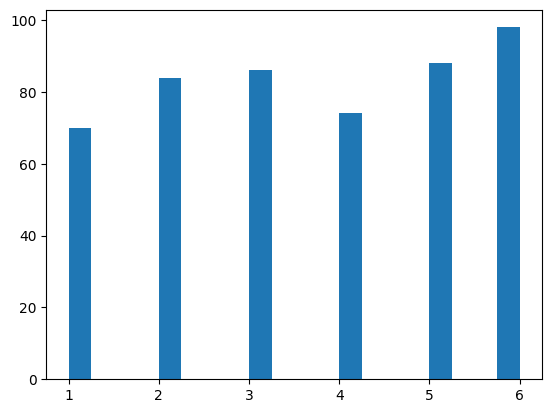

In [2]:
unique, counts = np.unique(data, return_counts=True)
print(unique, counts)
plt.hist(data, bins=20);

In [3]:
num_sixes = (data == 6).sum()
num_total = data.size

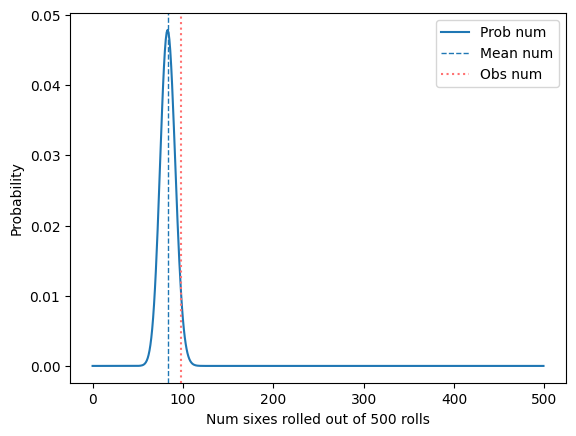

In [4]:
from scipy.stats import binom
n = np.arange(num_total)
prob_n = binom.pmf(n, num_total, 1/6)
plt.plot(n, prob_n, label="Prob num")
plt.axvline(num_total / 6, ls="--", lw=1, label="Mean num")
plt.axvline(num_sixes, ls=":", color="#ff7272", label="Obs num")
plt.xlabel(f"Num sixes rolled out of {num_total} rolls")
plt.ylabel("Probability")
plt.legend();

Only 3.7% of the time with a fair dice you'd roll this many or more sixes.


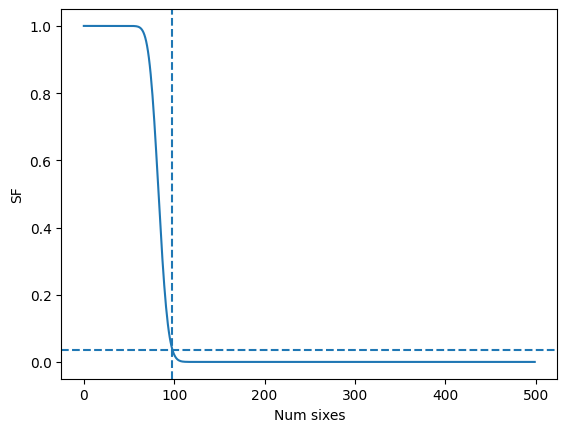

In [5]:
d = binom(num_total, 1/6)
plt.plot(n, d.sf(n))
plt.axvline(num_sixes, ls="--")
sf = d.sf(num_sixes)
plt.axhline(sf, ls="--")
plt.xlabel("Num sixes")
plt.ylabel("SF");
print(f"Only {sf * 100:.1f}% of the time with a fair dice you'd roll this many or more sixes.")

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Meteorite_Landings.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [7]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [8]:
df2 = df.dropna(subset=["mass", "year"])  # Remove NaN values
df2 = df2[df2["mass"] > 0]  # Zero mass impacts are also missing data

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45292 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45292 non-null  object 
 1   id           45292 non-null  int64  
 2   nametype     45292 non-null  object 
 3   recclass     45292 non-null  object 
 4   mass         45292 non-null  float64
 5   fall         45292 non-null  object 
 6   year         45292 non-null  float64
 7   reclat       38097 non-null  float64
 8   reclong      38097 non-null  float64
 9   GeoLocation  38097 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


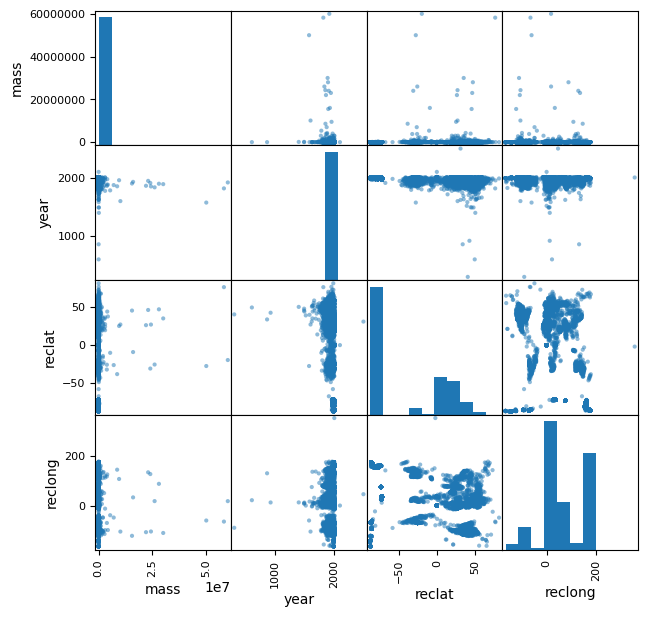

In [10]:
pd.plotting.scatter_matrix(df[["mass", "year", "reclat", "reclong"]], figsize=(7,7));

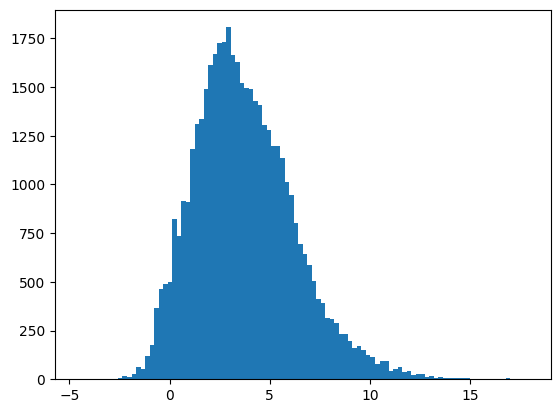

In [11]:
year = df2["year"]
masses = df2["mass"]
logmass = np.log(masses)
plt.hist(logmass, bins=100);

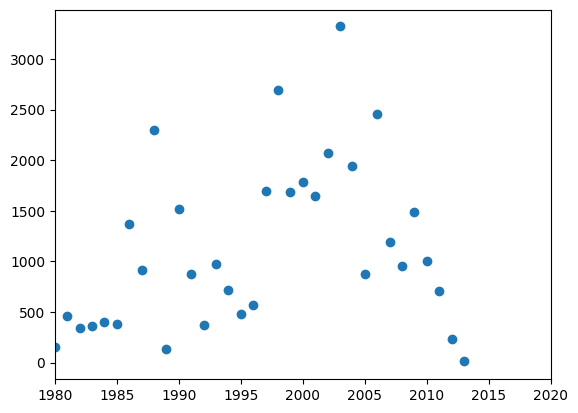

In [12]:
counts = year.value_counts()
plt.scatter(counts.index, counts)
plt.xlim(1980, 2020);

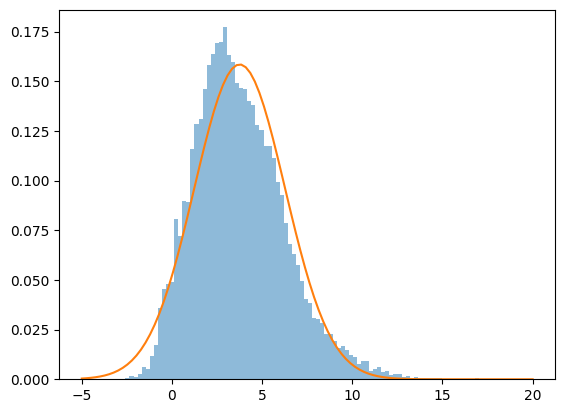

In [13]:
from scipy.stats import norm, skewnorm, lognorm
ms = np.linspace(-5, 20, 100)

mean, std = logmass.mean(), np.std(logmass)
pdf_norm = norm.pdf(ms, mean, std)
plt.hist(logmass, bins=100, density=True, alpha=0.5)
plt.plot(ms, pdf_norm);

/home/codespace/.local/lib/python3.12/site-packages/scipy/stats/_continuous_distns.py:6918: RuntimeWarning: invalid value encountered in log
  lndata = np.log(data - loc)


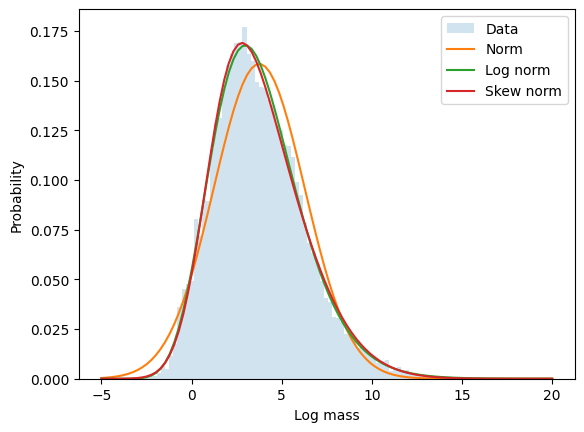

In [14]:
p_lognorm = lognorm.fit(logmass)
pdf_lognorm = lognorm.pdf(ms, *p_lognorm)

p_skewnorm = skewnorm.fit(logmass)
pdf_skewnorm = skewnorm.pdf(ms, *p_skewnorm)

plt.hist(logmass, bins=100, density=True, alpha=0.2, label="Data")
plt.plot(ms, pdf_norm, label="Norm")
plt.plot(ms, pdf_lognorm, label="Log norm")
plt.plot(ms, pdf_skewnorm, label="Skew norm");
plt.legend()
plt.xlabel("Log mass")
plt.ylabel("Probability");

In [15]:
mass_of_doom = np.log((4/3) * np.pi * 500**3 * 1600 * 1000)  # Just using a spherical approximation and some avg density
mass_of_doom

np.float64(34.36175044077777)

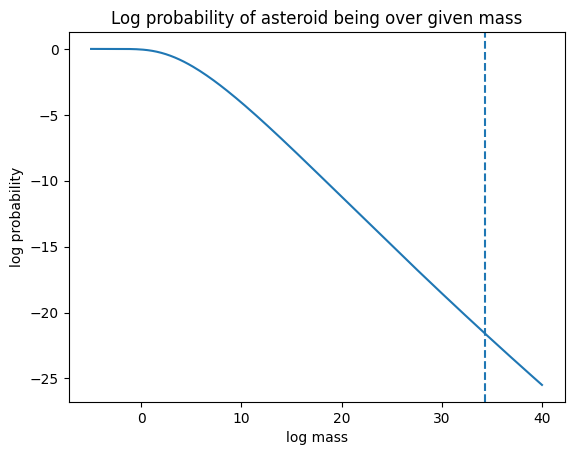

In [16]:
ms2 = np.linspace(-5, 40, 200)
plt.plot(ms2, lognorm.logsf(ms2, *p_lognorm))
plt.axvline(mass_of_doom, ls="--")
plt.xlabel("log mass")
plt.ylabel("log probability")
plt.title("Log probability of asteroid being over given mass");

In [17]:
prob_small_mass = lognorm.logcdf(mass_of_doom, *p_lognorm)
frac_sky_monitored = 0.2
num_years = 1000
num_events = num_years * counts.max() / frac_sky_monitored
prob_bad = 1 - np.exp(num_events * prob_small_mass)
print(f"Prob a >1km asteroid impacts with {num_years} years is {prob_bad * 100:.2f}%")

Prob a >1km asteroid impacts with 1000 years is 0.67%


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

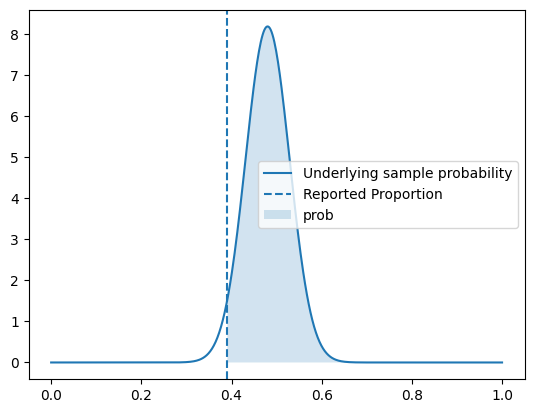

In [19]:
sigma = np.sqrt(0.39 * 0.61 / 100)
reported = 0.39
sample = 0.48

xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, sample, sigma)
plt.plot(xs, ps, label="Underlying sample probability")
plt.axvline(reported, ls="--", label="Reported Proportion")
plt.fill_between(xs, ps, 0, alpha=0.2, where=xs>=reported, label="prob")
plt.legend();

In [20]:
prob_more = norm.sf(reported, sample, sigma)
print(f"There is a {100 * prob_more:.1f}% chance that Candidate A would have received more votes")

There is a 96.7% chance that Candidate A would have received more votes


In [21]:
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.95)
print(f"{z_score:.3f} is larger than {z_score_needed_for_significance:.3f}, so we are significant")
print(f"Have p-value {norm.sf(sample, reported, sigma):.3f}")

1.845 is larger than 1.645, so we are significant
Have p-value 0.033


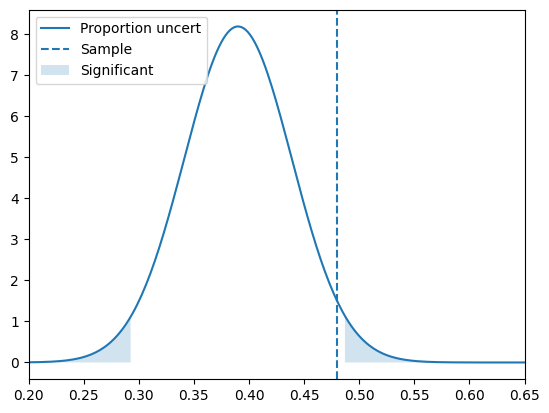

In [22]:
xs = np.linspace(0, 1, 500)
ps = norm.pdf(xs, reported, sigma)

plt.plot(xs, ps, label="Proportion uncert")
plt.axvline(sample, ls="--", label="Sample")
limits = norm.ppf([0.025, 0.975], reported, sigma)
plt.fill_between(xs, ps, 0, alpha=0.2, where=(xs<limits[0])|(xs>limits[1]), label="Significant")
plt.legend(loc=2)
plt.xlim(0.2, 0.65);

In [23]:
# Using z-scores
z_score = (sample - reported) / sigma
z_score_needed_for_significance = norm.ppf(0.975)
print(f"{z_score:.3f} is less than {z_score_needed_for_significance:.3f}, so we aren't significant")

# Using p-values
p_value_two_tailed = 2 * norm.sf(z_score)
print(f"{p_value_two_tailed:.3f} is > 0.05")

1.845 is less than 1.960, so we aren't significant
0.065 is > 0.05
